# 1. 50_Startups, Profit prediction model

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [2]:
#import dataset
spend_df = pd.read_csv("/Users/praing57504/Desktop/Data science/Assignments/5_Multi Linear Regression/50_Startups.csv")
spend_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
#dataframe inforamtion
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### No null values

In [4]:
#check weather datframe has duplicate records
spend_df[spend_df.duplicated()].count()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### No duplicate records

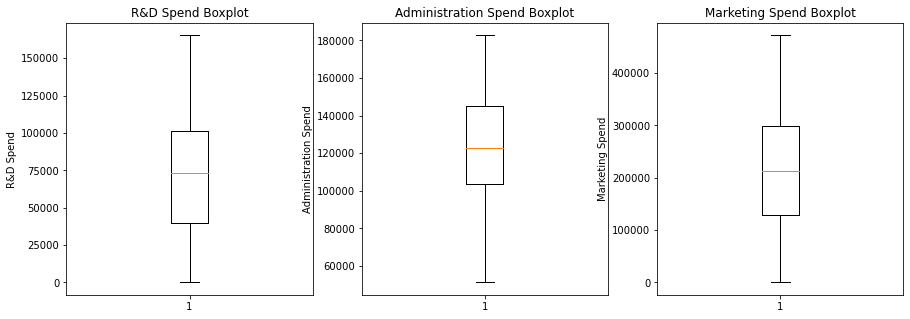

In [5]:
#Barplot to check outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(spend_df["R&D Spend"]);
plt.title("R&D Spend Boxplot")
plt.ylabel("R&D Spend")

plt.subplot(1,3,2)
plt.boxplot(spend_df["Administration"]);
plt.title("Administration Spend Boxplot")
plt.ylabel("Administration Spend")

plt.subplot(1,3,3)
plt.boxplot(spend_df["Marketing Spend"]);
plt.title("Marketing Spend Boxplot")
plt.ylabel("Marketing Spend")
plt.show()

### No outliers

C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

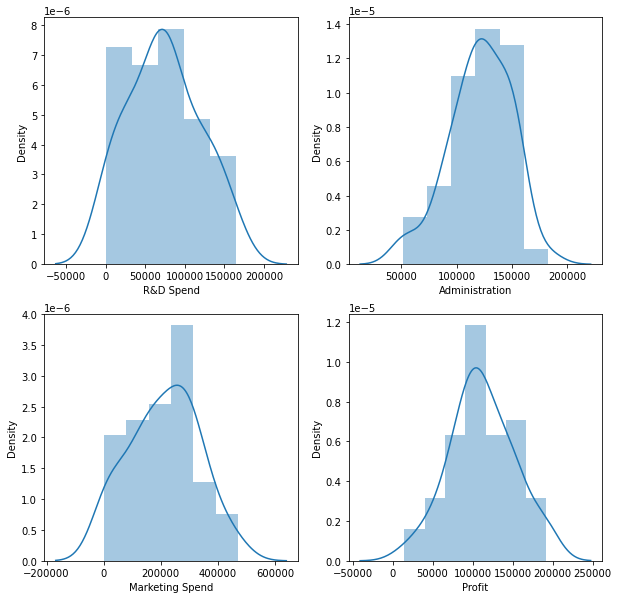

In [6]:
#Distributiion of the data
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(spend_df["R&D Spend"]);

plt.subplot(222)
sns.distplot(spend_df["Administration"]);

plt.subplot(223)
sns.distplot(spend_df["Marketing Spend"]);

plt.subplot(224)
sns.distplot(spend_df["Profit"]);

### Data values are almost normally distributed

In [7]:
#Updation of column names
spend_df_eda = spend_df.rename({"R&D Spend":"RDSpend","Administration":"ADSpend","Marketing Spend":"MRKSpend"}, axis=1)

In [8]:
spend_df_eda["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

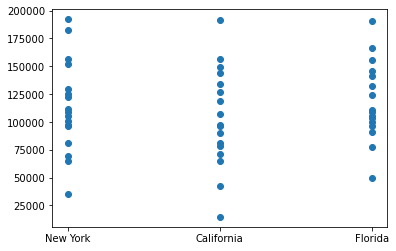

In [9]:
#Profict distribtion with statewise (Catogorical values)
plt.scatter(x=spend_df_eda["State"],y=spend_df_eda["Profit"])

## State catogorical values directly does not have much impcat on Profit

In [10]:
#Drop column State
spend_df_eda = spend_df_eda.drop("State", axis=1)

In [11]:
#To check min, max and median values
spend_df_eda.describe()

,RDSpend,ADSpend,MRKSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
# #Data transformation to standard scale as min and max are far from each other
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale = scale.fit_transform(X=spend_df_eda)
spend_df_std = pd.DataFrame(scale,columns=spend_df_eda.columns)

In [13]:
#Correlatioon matrix
spend_df_std.corr()

,RDSpend,ADSpend,MRKSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
ADSpend,0.241955,1.000000,-0.032154,0.200717
MRKSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


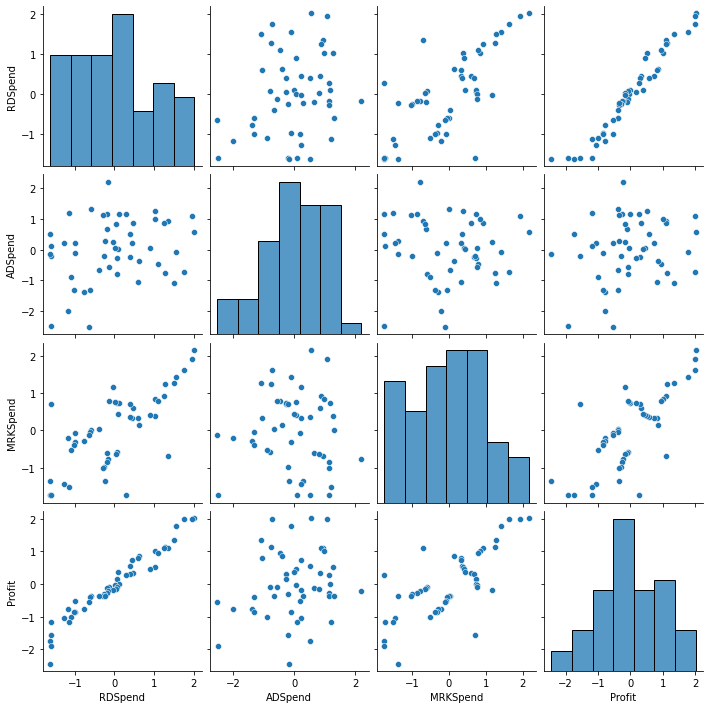

In [14]:
#correlation plot
sns.pairplot(spend_df_std);

# Base Model

In [15]:
#Model
model_profit_base = smf.ols("Profit ~ RDSpend+ADSpend+MRKSpend",data=spend_df_std).fit()

In [16]:
#Base model t and p values
model_profit_base.tvalues, model_profit_base.pvalues

(Intercept   -1.590412e-14
 RDSpend      1.784637e+01
 ADSpend     -5.255068e-01
 MRKSpend     1.655077e+00
 dtype: float64,
 Intercept    1.000000e+00
 RDSpend      2.634968e-22
 ADSpend      6.017551e-01
 MRKSpend     1.047168e-01
 dtype: float64)

In [17]:
#base model rsqured value
round(model_profit_base.rsquared,3), round(model_profit_base.rsquared_adj,3)

(0.951, 0.948)

### For ADSpend and MRKSpend has p-values greater than significant value (0.05)

### Model with only independent variable ADSpend

In [18]:
#Model with only independent variable ADSpend
model_profit_adspend = smf.ols("Profit ~ ADSpend",data=spend_df_std).fit()

In [19]:
#t and p values
model_profit_adspend.tvalues, model_profit_adspend.pvalues

(Intercept   -3.680455e-15
 ADSpend      1.419493e+00
 dtype: float64,
 Intercept    1.000000
 ADSpend      0.162217
 dtype: float64)

#### Even when Administratative varibale is used alone p value is not significant, so it will not be used in the model

### Model with only independent variable MRKSpend

In [20]:
#Model with independent variable MRKSpend
model_profit_mrkspend = smf.ols("Profit ~ MRKSpend",data=spend_df_std).fit()

In [21]:
#t and p values
model_profit_mrkspend.tvalues, model_profit_mrkspend.pvalues

(Intercept   -5.430358e-15
 MRKSpend     7.802657e+00
 dtype: float64,
 Intercept    1.000000e+00
 MRKSpend     4.381073e-10
 dtype: float64)

## Final Model

In [22]:
model_profit =smf.ols("Profit ~ RDSpend+MRKSpend",data=spend_df_std).fit()

In [23]:
#t and p values
model_profit.tvalues, model_profit.pvalues

(Intercept   -1.602802e-14
 RDSpend      1.926556e+01
 MRKSpend     1.927052e+00
 dtype: float64,
 Intercept    1.000000e+00
 RDSpend      6.040433e-24
 MRKSpend     6.003040e-02
 dtype: float64)

In [24]:
#r squared values
round(model_profit.rsquared,3)

0.95

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

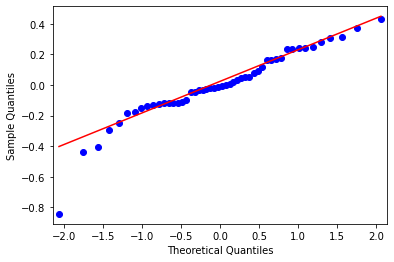

In [25]:
import statsmodels.api as sm
qqplot = sm.qqplot(model_profit.resid, line="q")

### Residual Plot for Homoscedasticity

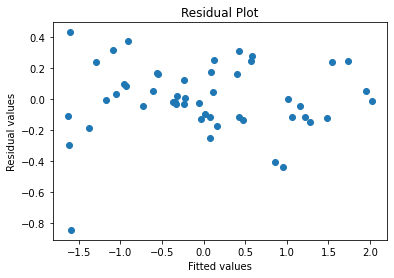

In [26]:
plt.scatter(model_profit.fittedvalues, model_profit.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

### Residual Vs Regressors

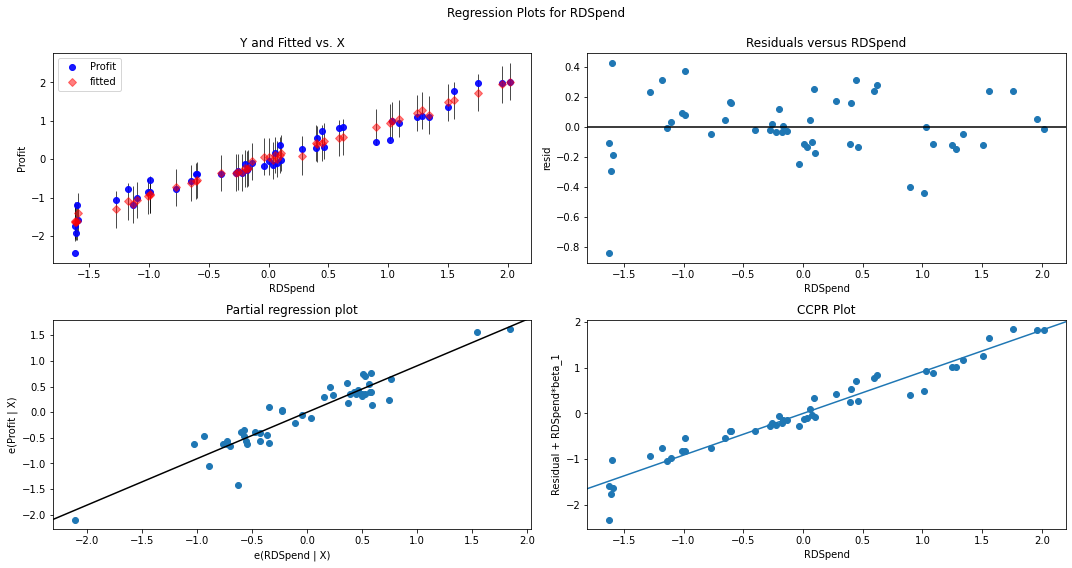

In [27]:
#For RDSpend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_profit, "RDSpend", fig=fig)
plt.show()

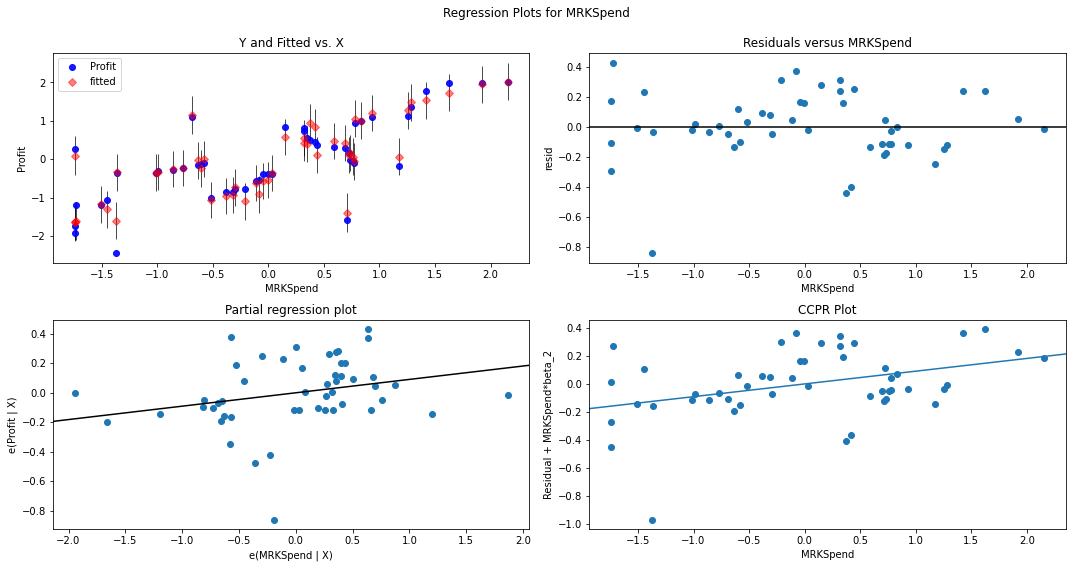

In [28]:
#For MRKSpend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_profit, "MRKSpend", fig=fig)
plt.show()

### Detecting Influencers/Outliers

In [29]:
#cook's distance
model_influence = model_profit.get_influence()
(c, _) = model_influence.cooks_distance

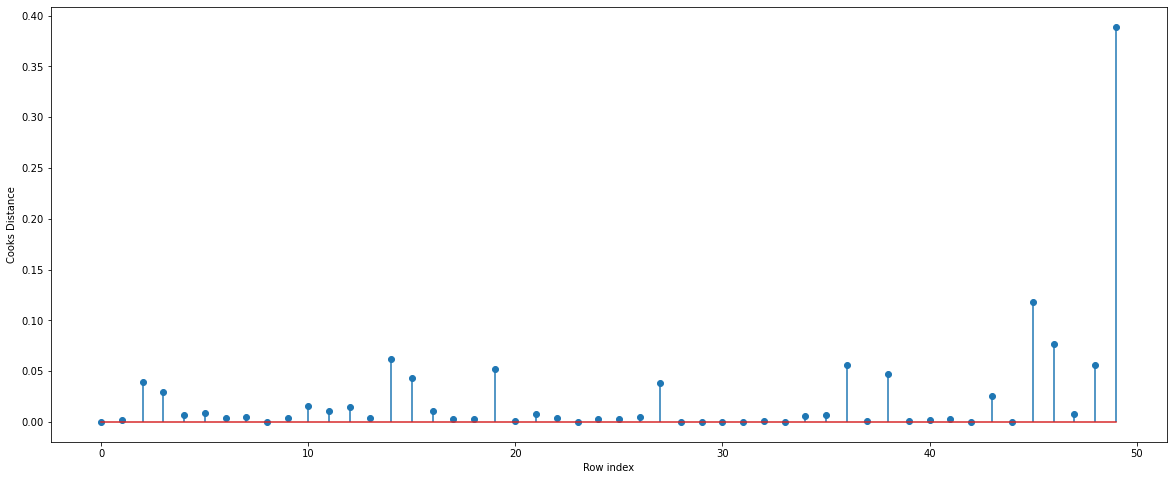

In [30]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(spend_df_eda)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

### No outliers as cook's distance < 1 for all records

In [31]:
round(model_profit.rsquared,4)

0.9505

In [32]:
#Score with log trnaformed variables

spend_df_log = spend_df_std.apply(np.log)
model_profit_log =smf.ols("Profit ~ RDSpend+MRKSpend",data=spend_df_log).fit()
round(model_profit_log.rsquared,4)

0.7629

In [33]:
#Score with sqrt trnaformed variables

spend_df_sqrt = spend_df_eda.apply(np.sqrt)
model_profit_sqrt =smf.ols("Profit ~ RDSpend+MRKSpend",data=spend_df_sqrt).fit()
round(model_profit_sqrt.rsquared,4)

0.9302

In [34]:
#Score with squared trnaformed variables

spend_df_sqr = spend_df_eda.apply(np.square)
model_profit_sqr =smf.ols("Profit ~ RDSpend+MRKSpend",data=spend_df_sqr).fit()
round(model_profit_sqr.rsquared,4)

0.95

## Model score with different transformations

In [35]:
print("1. Model with z score transformed variables : ", round(model_profit.rsquared,4))
print("2. Model with log transformed variables : ", round(model_profit_log.rsquared,4))
print("3. Model with sqrt transformed variables : ", round(model_profit_sqrt.rsquared,4))
print("4. Model with squared transformed variables : ", round(model_profit_sqr.rsquared,4))

1. Model with z score transformed variables :  0.9505
2. Model with log transformed variables :  0.7629
3. Model with sqrt transformed variables :  0.9302
4. Model with squared transformed variables :  0.95
